# Activity 7

* Download the Activity7 lab and upload it onto Google Colab.
* Answer the Activity7 questions in Canvas and populate the cells below
* Submit Activity7 questions on Canvas and upload the PDF version of this lab:
>* To submit the this lab as PDF, go to File, click Print, then save it as PDF instead of printing it

# Business Problem

Ted Cordaro is the Director of HR Analytics at a large multinational corporation. Turnover has been high in the Research & Development Department at the company in recent years and Ted has been tasked with building a model to predict employee attrition. Attrition occurs when an employee leaves the company. Ted also wants to know which factors are most important in predicting which employees will leave. Ted has information about past and present employees, including demographics, job characteristics, and HR survey response data.


First, you will help Ted train and evaluate a Logistic Regression classification model. Then, you will help Ted train and evaluate a Decision Tree classification model.

An overview of the **HRData** dataset is below:

| Variable   |   Description |
| ----------- | ----------- |
| Age | The age of the employee (in years)|
| BusinessTravel | The level of travel the employee does for work (0: no travel, 1: some travel, 2: frequent travel)|
| DistanceFromHome | The distance the employee commutes to work (in miles)|
| Education | The employee's education level (ranging from 1-5)|
| EnvironmentSatisfaction |The employee's satisfaction with their work environment (ranging from 1-4)|
| Married | Indicates if the employee is married (1) or not (0)|
| MonthlyIncome | The employee's monthly pre-tax salary (in USD)|
| OverTime | Indicates if the employee is eligible for overtime compensation (1) or not (0)|
| PerformanceRating | The performance rating the employee received from their direct supervisor (ranging from 3-4)|
| StockOptionLevel | The level of stock options the employee has (ranging from 0-3)|
| TrainingTimesLastYear | The number of times the employee participated in training last year|
| WorkLifeBalance | The level of employee's work-life balance (ranging from 1-4)|
| YearsAtCompany | The number of years that the employee has been employed with the company|
| Attrition | Indicates if the employee left the company (1) or not (0)|


# Import Packages

In [ ]:
# do not manipluate this cell - just run it

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import set_config
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

set_config(transform_output = "pandas")

# Data Import

In [ ]:
# do not manipluate this cell - just run it

data = pd.read_csv('https://raw.githubusercontent.com/CHill-MSU/INFO265_Data/refs/heads/main/HRData.csv')
data.head()

,Age,BusinessTravel,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,JobLevel,JobSatisfaction,Married,MonthlyIncome,OverTime,PerformanceRating,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,Attrition
0,49,2,8,1,3,0,2,2,1,5130,0,4,1,3,3,10,0
1,37,1,2,2,4,0,1,3,0,2090,1,3,0,3,3,0,1
2,33,2,3,4,4,1,1,3,1,2909,1,3,0,3,3,8,0
3,27,1,2,1,1,0,1,2,1,3468,0,3,1,3,3,2,0
4,32,2,2,2,4,0,1,4,0,3068,0,3,0,2,2,7,0


In [ ]:
# do not manipluate this cell - just run it

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      961 non-null    int64
 1   BusinessTravel           961 non-null    int64
 2   DistanceFromHome         961 non-null    int64
 3   Education                961 non-null    int64
 4   EnvironmentSatisfaction  961 non-null    int64
 5   Gender                   961 non-null    int64
 6   JobLevel                 961 non-null    int64
 7   JobSatisfaction          961 non-null    int64
 8   Married                  961 non-null    int64
 9   MonthlyIncome            961 non-null    int64
 10  OverTime                 961 non-null    int64
 11  PerformanceRating        961 non-null    int64
 12  StockOptionLevel         961 non-null    int64
 13  TrainingTimesLastYear    961 non-null    int64
 14  WorkLifeBalance          961 non-null    int64
 15  YearsA

In [ ]:
# do not manipluate this cell - just run it

data.describe()

,Age,BusinessTravel,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,JobLevel,JobSatisfaction,Married,MonthlyIncome,OverTime,PerformanceRating,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,Attrition
count,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000
mean,37.042664,1.088450,9.144641,2.899063,2.744017,0.394381,1.977107,2.726327,0.450572,6281.252862,0.281998,3.162331,0.804370,2.792924,2.725286,6.864724,0.138398
std,9.178964,0.531783,8.122044,1.024293,1.102567,0.488972,1.152667,1.101620,0.497810,4895.835087,0.450207,0.368946,0.857092,1.314103,0.716964,6.024119,0.345497
min,18.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1009.000000,0.000000,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,30.000000,1.000000,2.000000,2.000000,2.000000,0.000000,1.000000,2.000000,0.000000,2741.000000,0.000000,3.000000,0.000000,2.000000,2.000000,3.000000,0.000000
50%,36.000000,1.000000,7.000000,3.000000,3.000000,0.000000,2.000000,3.000000,0.000000,4374.000000,0.000000,3.000000,1.000000,3.000000,3.000000,5.000000,0.000000
75%,43.000000,1.000000,14.000000,4.000000,4.000000,1.000000,3.000000,4.000000,1.000000,7655.000000,1.000000,3.000000,1.000000,3.000000,3.000000,9.000000,0.000000
max,60.000000,2.000000,29.000000,5.000000,4.000000,1.000000,5.000000,4.000000,1.000000,19999.000000,1.000000,4.000000,3.000000,6.000000,4.000000,40.000000,1.000000


<Axes: ylabel='Frequency'>

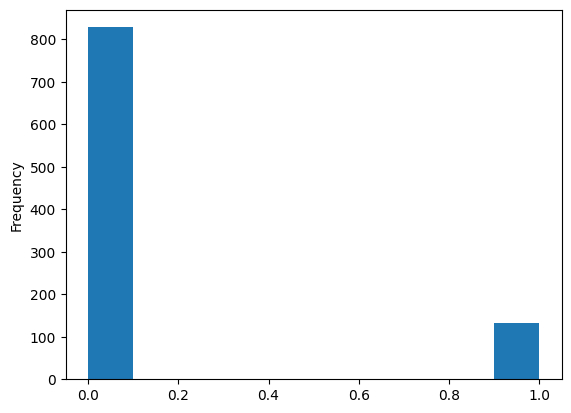

In [ ]:
# do not manipluate this cell - just run it

data['Attrition'].plot.hist()

In [ ]:
# do not manipluate this cell - just run it

X = data.drop('Attrition', axis = 1)
y = data['Attrition']
train_X, test_X, train_y, test_y = train_test_split(X, y,test_size = 0.3, stratify = y, random_state = 123)

# Part 1: Logistic Regression

## Q1

* Which of the following code lines should you use to train a logistic regression model to predict if an employee will leave the company? Use balanced class weights to address class imbalance.
* Select the right answer from Canvas, paste it below, and run the cell

In [ ]:
# Copy and paste your answer from Canvas to Here

logr = LogisticRegression(solver = 'liblinear', random_state = 123, class_weight = 'balanced')
logr.fit(train_X, train_y)

LogisticRegression(class_weight='balanced', random_state=123,
                   solver='liblinear')

## Q2

* Run the code cell below to output the fitted coefficients for you linear regression model.
* Based on the output, which of the following statements is true?
* Select the right answer from Canvas.

In [ ]:
# do not manipluate this cell - just run it

print('Intercept              ', logr.intercept_)
print(pd.DataFrame(zip(logr.feature_names_in_, np.transpose(logr.coef_.squeeze())), columns = ['Variable', 'Coefficient']))

Intercept               [1.17701247]
                   Variable  Coefficient
0                       Age    -0.033498
1            BusinessTravel     0.957943
2          DistanceFromHome     0.012624
3                 Education     0.352628
4   EnvironmentSatisfaction    -0.314841
5                    Gender    -0.683387
6                  JobLevel    -0.008401
7           JobSatisfaction    -0.365535
8                   Married    -0.152506
9             MonthlyIncome    -0.000116
10                 OverTime     1.716763
11        PerformanceRating     0.419570
12         StockOptionLevel    -0.605813
13    TrainingTimesLastYear    -0.095202
14          WorkLifeBalance    -0.418491
15           YearsAtCompany     0.022362


## Q3

* No code needed.
* Select the right answer in Canvas.

## Q4

* Run the code cell below to obtain predictions and output the confusion matrix.
* Based on the output, the specificity of the model is _____?
* Select the right answer from Canvas.

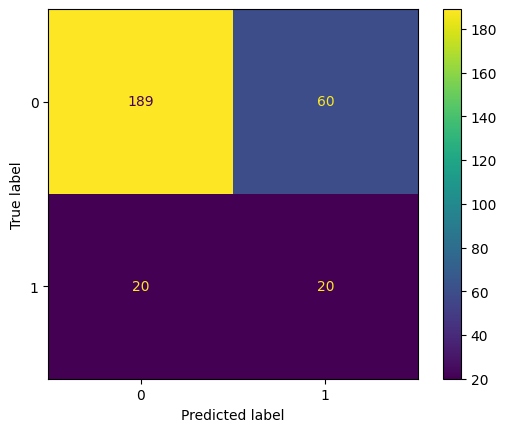

In [ ]:
# do not manipluate this cell - just run it

preds_lr = logr.predict(X = test_X)
ConfusionMatrixDisplay.from_predictions(test_y, preds_lr)

## Q5

* Run the code cell below to obtain the classification report output for the Logistic Regression classification model predicting if an employee will leave the company.
* Based on the output, which of the following statements is true?
* Select the right answer from Canvas.

In [ ]:
# do not manipluate this cell - just run it

print(classification_report(test_y, preds_lr))

              precision    recall  f1-score   support

           0       0.90      0.76      0.83       249
           1       0.25      0.50      0.33        40

    accuracy                           0.72       289
   macro avg       0.58      0.63      0.58       289
weighted avg       0.81      0.72      0.76       289



# Part 2: Decision Trees



## Q6

* Which of the following code lines should you use to train a Decision Tree classification model to predict if an employee will leave the company? Use a maximum depth of 2 and balanced class weights to address class imbalance.
* Select the right answer from Canvas, paste it below, and run the cell

In [ ]:
# Copy and paste your answer from Canvas to Here

dt = DecisionTreeClassifier(random_state = 123, max_depth = 2, class_weight = 'balanced')
dt.fit(train_X, train_y)

DecisionTreeClassifier(class_weight='balanced', max_depth=2, random_state=123)

## Q7

* Run the code cell below to output the fitted Decision Tree plot.
* Based on the output, which of the following statements is true?
* Select the right answer from Canvas.

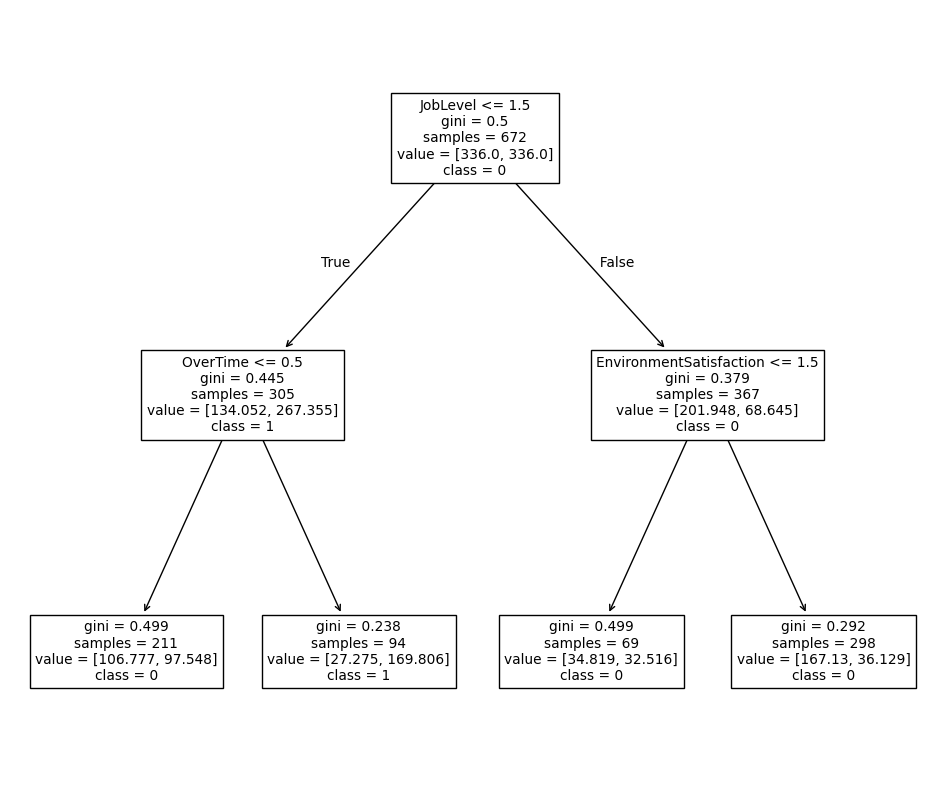

In [ ]:
# do not manipluate this cell - just run it

# increase plot size
fig = plt.figure(figsize=(12, 10))
# create and plot tree
tree_plot = plot_tree(decision_tree = dt, # use optimal tree from grid search pipeline
                      feature_names = dt.feature_names_in_, # identify variable names
                      class_names=['0', '1']) # set target class levels

## Q8

* No code needed.
* Select the right answer in Canvas.

## Q9

* Run the code cell below to output the variable importance information for the fitted Decision Tree classification model.
* Based on the output, which of the following statements is true?
* Select the right answer from Canvas.

In [ ]:
# do not manipluate this cell - just run it

dtt_imp = pd.DataFrame({'variable': dt.feature_names_in_, 'importance': dt.feature_importances_})
dtt_imp.sort_values('importance', ascending = False)

,variable,importance
6,JobLevel,0.584755
10,OverTime,0.315038
4,EnvironmentSatisfaction,0.100206
0,Age,0.000000
3,Education,0.000000
2,DistanceFromHome,0.000000
5,Gender,0.000000
1,BusinessTravel,0.000000
7,JobSatisfaction,0.000000
8,Married,0.000000


## Q10

* Run the code cell below to make class predictions and output the confusion matrix and classification performance measures for the Decision Tree model predicting if an employee will leave the company.
* Based on the output, which of the following statements is true?
* Select the right answer from Canvas.

              precision    recall  f1-score   support

           0       0.90      0.93      0.92       249
           1       0.47      0.38      0.42        40

    accuracy                           0.85       289
   macro avg       0.69      0.65      0.67       289
weighted avg       0.84      0.85      0.85       289



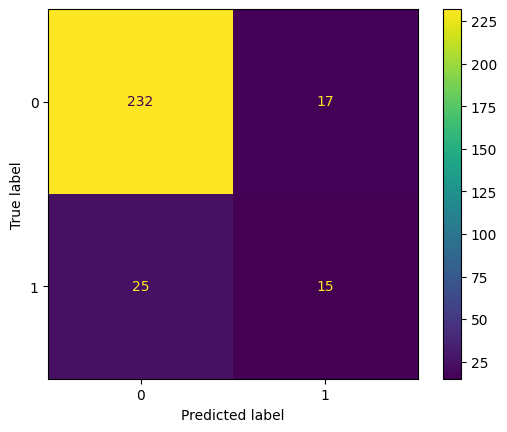

In [ ]:
# do not manipluate this cell - just run it

preds_dt = dt.predict(X = test_X)
ConfusionMatrixDisplay.from_predictions(test_y, preds_dt)
print(classification_report(test_y, preds_dt))

## Q11 (Extra Credit)

* No code needed.
* Select the right answer in Canvas.